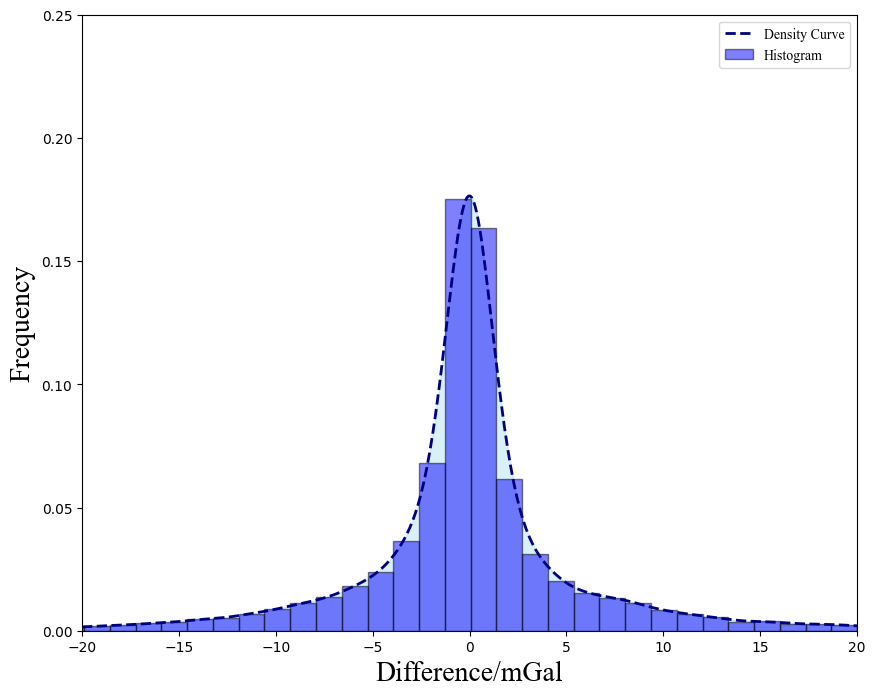

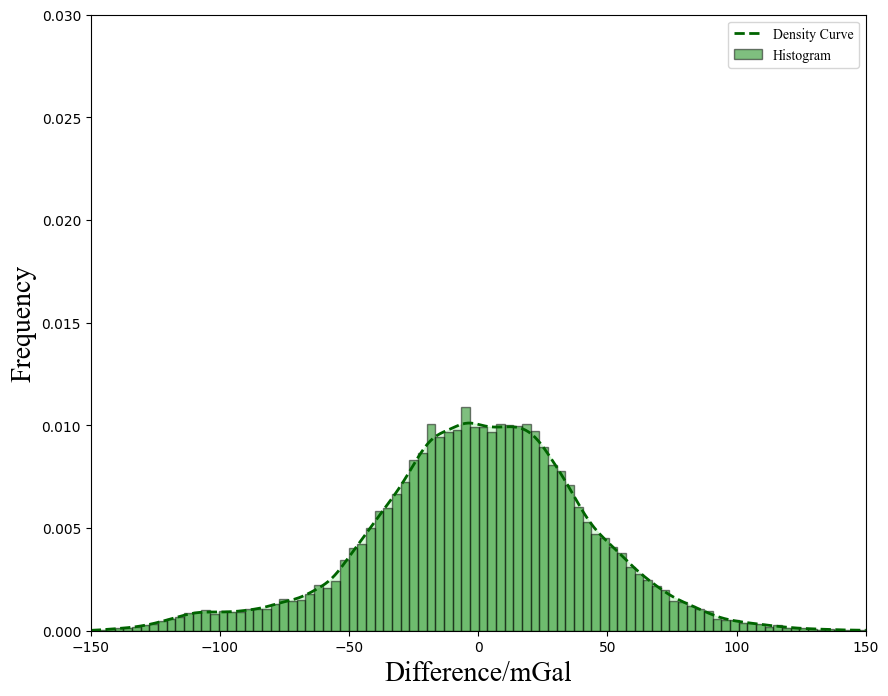

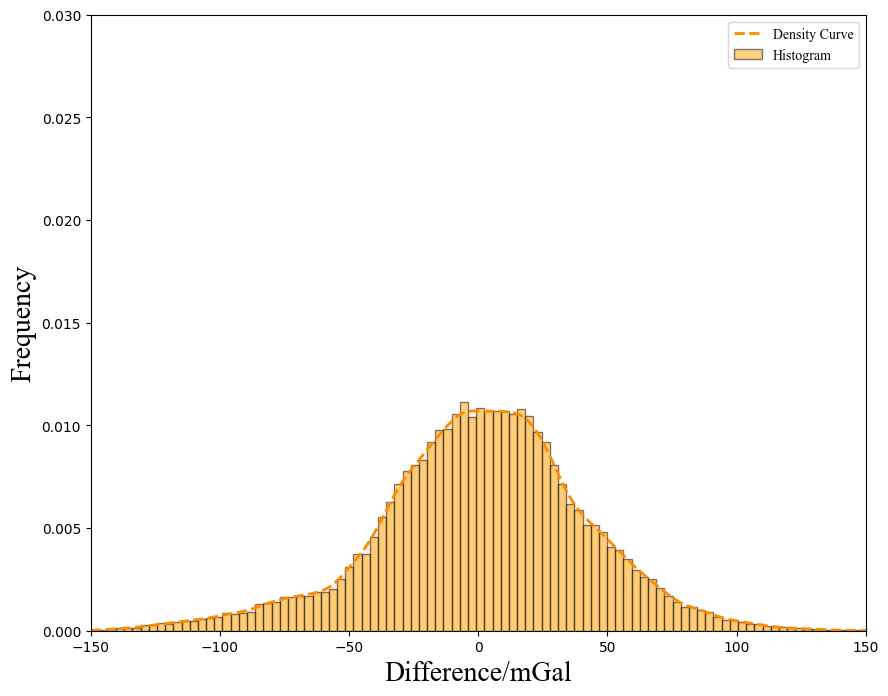

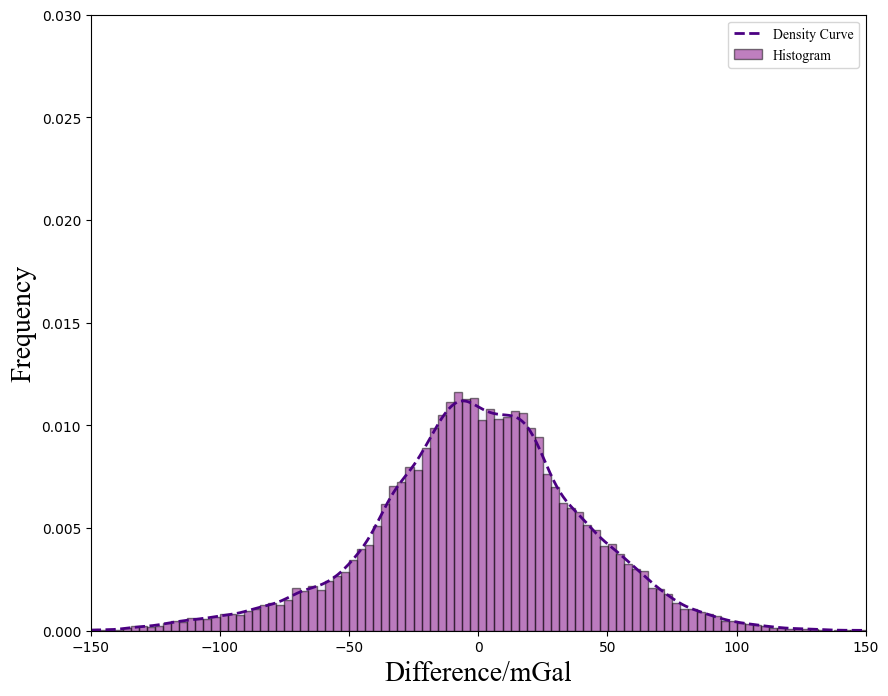

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
from scipy.stats import gaussian_kde

# 加载数据
df = pd.read_csv('重力数据2整体数据结果.csv')
value = df['value'].values
RNNprediction = df['RNNValue'].values
RFprediction = df['RFValue'].values
SVMprediction = df['SVMValue'].values
krigingprediction = df['KrigingValue'].values

# 计算差值
RNNdifferences = RNNprediction - value
RFdifferences = RFprediction - value
SVMdifferences = SVMprediction - value
krigingdifferences = krigingprediction - value

# 字体设置
font_path = 'C:/Windows/Fonts/simsun.ttc'  # 请根据您的系统字体路径进行修改
font_prop_2 = FontProperties(family='Times New Roman')

# 定义绘图函数
def plot_difference(data, filename, xlim, ylim, title_color, fill_color, line_color):
    fig = plt.figure(figsize=(10, 8))
    
    # KDE 曲线
    kde = gaussian_kde(data)
    x = np.linspace(xlim[0], xlim[1], 500)
    kde_values = kde(x)
    plt.fill_between(x, kde_values, color=fill_color, alpha=0.3)  # 填充区域
    plt.plot(x, kde_values, color=line_color, linewidth=2, linestyle='--', label="Density Curve")  # KDE 曲线

    # 叠加直方图
    plt.hist(data, bins=100, density=True, alpha=0.5, color=title_color, edgecolor='black', label="Histogram")
    
    # 设置坐标轴和标题
    plt.xlim(xlim)
    plt.ylim(ylim)
    plt.xlabel('Difference/mGal', fontproperties=font_prop_2, fontsize=20)
    plt.ylabel('Frequency', fontproperties=font_prop_2, fontsize=20)
    plt.legend(prop=font_prop_2, fontsize=15)
    
    # 保存图像
    plt.savefig(filename)
    plt.show()

# 绘制各组图
plot_difference(RFdifferences, '图16RF.png', xlim=(-20, 20), ylim=(0, 0.25),
                title_color='blue', fill_color='skyblue', line_color='navy')
plot_difference(RNNdifferences, '图16RNN.png', xlim=(-150, 150), ylim=(0, 0.03),
                title_color='green', fill_color='lightgreen', line_color='darkgreen')
plot_difference(SVMdifferences, '图16SVM.png', xlim=(-150, 150), ylim=(0, 0.03),
                title_color='orange', fill_color='peachpuff', line_color='darkorange')
plot_difference(krigingdifferences, '图16kriging.png', xlim=(-150, 150), ylim=(0, 0.03),
                title_color='purple', fill_color='lavender', line_color='indigo')
